In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
import pickle
import joblib


In [2]:
df = pd.read_csv('C:\\Users\\User\\Machine Learning\\practice\\mobile\\train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
X_test = pd.read_csv('C:\\Users\\User\\Machine Learning\\practice\\mobile\\test.csv')
X_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [5]:
v =X_test

In [61]:
v.to_csv('X_test.csv',index=False)

In [6]:
v.drop('id',axis=1,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [53]:
df['talk_time'].min()

np.int64(2)

# Feature Description
- Battery_Power : The phone battery power in mah
- Blue : If the phone has bluetooth or not
- Clock_speed : The speed at which microprocessor executes instructions
- Dual_sim : If the phone has Dual_sim or not
- Fc : Front Camera mega pixels
- Four_g : Has 4G support or not
- Int_memory : Internal Memory in Gigabytes
- M_dep : Mobile Depth in cm
- Mobile_wt : Weight of mobile phone
- n_cores : Number of cores of processor
- Pc :  Primary camera megapixels
- Px_height : Height of the display screen in pixels
- Px_width : Width of the display screen in pixels
- Ram : Random Access Memory (in MB)
- Sc_h : Screen height in some unit(cm)
- Sc_w : Screen width in some unit(cm)
- Talk_time : Maximum talk time on a single battery charge (in hours)
- Three_g : 3G support or not
- Touch_screen : Is a touch screen or not
- Wifi : Has wifi or not
- Price_range : The price range of the phone from low cost, medium_cost, high_cost, very_high_cost



In [8]:
cols = ['battery_power','ram','int_memory','clock_speed','n_cores','price_range']
corr = df[cols].corr()
corr.style.background_gradient(axis=None)
# from this we can see that Ram has a high correlation with price_range

,battery_power,ram,int_memory,clock_speed,n_cores,price_range
battery_power,1.000000,-0.000653,-0.004004,0.011482,-0.029727,0.200723
ram,-0.000653,1.000000,0.032813,0.003443,0.004868,0.917046
int_memory,-0.004004,0.032813,1.000000,0.006545,-0.028310,0.044435
clock_speed,0.011482,0.003443,0.006545,1.000000,-0.005724,-0.006606
n_cores,-0.029727,0.004868,-0.028310,-0.005724,1.000000,0.004399
price_range,0.200723,0.917046,0.044435,-0.006606,0.004399,1.000000


Text(0.5, 1.0, 'Relationship of Ram and Internal Memory with Price Range')

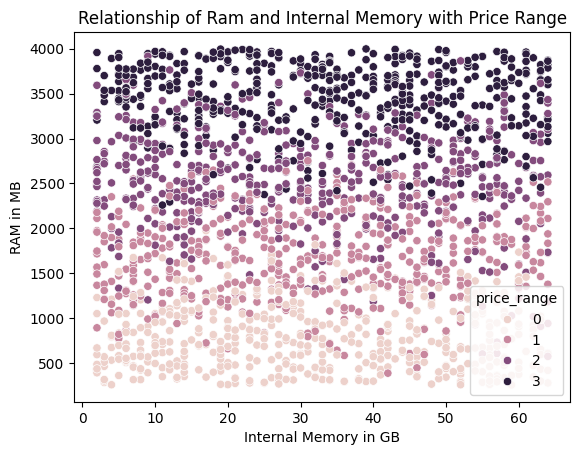

In [9]:
sns.scatterplot(data=df,x='int_memory',y='ram',hue='price_range')
plt.xlabel('Internal Memory in GB')
plt.ylabel('RAM in MB')
plt.title('Relationship of Ram and Internal Memory with Price Range')

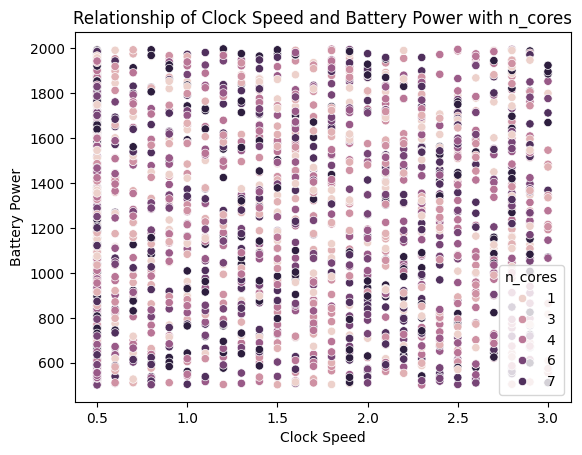

In [10]:
sns.scatterplot(data=df,x='clock_speed',y='battery_power',hue='n_cores')
plt.xlabel('Clock Speed')
plt.ylabel('Battery Power')
plt.title('Relationship of Clock Speed and Battery Power with n_cores');

In [11]:
target = 'price_range'
inputs = df.drop(target,axis=1)
X = inputs
y = df[target]

In [12]:
class_count = Counter(y)
class_count

Counter({1: 500, 2: 500, 3: 500, 0: 500})

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=30)

In [14]:
model = DecisionTreeClassifier(random_state=30)

In [15]:
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=30)

In [16]:
y_predict = model.predict(X_test)

In [17]:
model.score(X_train,y_train)

1.0

In [18]:
accuracy = accuracy_score(y_test,y_predict)
accuracy

0.79

In [19]:
precision = precision_score(y_test,y_predict,average='weighted')
precision

0.7991977101845523

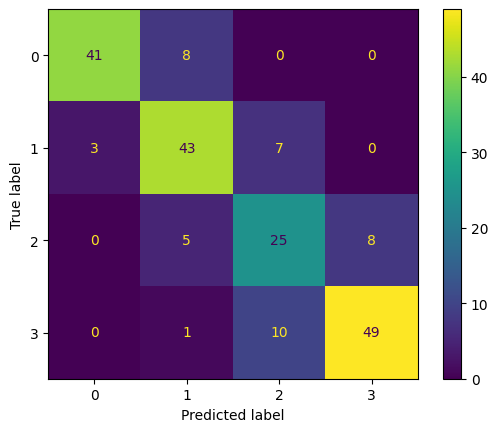

In [20]:
ConfusionMatrixDisplay.from_predictions(y_test,y_predict)

In [53]:
with open('Mobile_model.pkl','wb') as f :
    pickle.dump(model,f) 

In [59]:
feature_name = X.columns.tolist()
target_name = y.unique().tolist()
joblib.dump({'feature_name':feature_name,'target_name':target_name},'mobile_metadata.joblib')

['mobile_metadata.joblib']

In [21]:
y_predict[:20]

array([3, 0, 1, 1, 2, 1, 3, 3, 1, 1, 1, 0, 2, 0, 2, 1, 0, 2, 3, 1])

In [23]:
def pre(file):
    df = pd.read_csv(file)

    p = model.predict(df)

    return p[:20]

In [24]:
pre('X_test.csv')

array([3, 3, 2, 3, 1, 3, 3, 1, 2, 0, 3, 3, 0, 0, 2, 1, 2, 1, 3, 2])

In [25]:
pre('test2.csv')

array([3, 3, 2, 3, 1, 3, 3, 1, 2, 0])